# COSC 130 - Project 1

### Malcolm Nichols

We are to take a dataset of vehicle models. Based on the vehicles weight we will then create
a linear model that can be used to estimate the natural logarithm of the average MPG for a
vehicle. So for our model the log-MPG will be our response variable while weight will be the predictor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Importing and Viewing the Data

Task one will have us import and then view the data.

In [2]:
df = pd.read_table(filepath_or_buffer = 'auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

Next step will be to confirm that each list contains our 398 values

In [3]:
print(len(weight))
print(len(mpg))
print(len(ln_mpg))

398
398
398


Next, we will view the information for the first 10 vehicles in the dataset.

In [4]:
print("Weight\t   MPG\t  LN_MPG")
print("------------------------")
for i in range(0,10):
    print(f"{weight[i]:>6}{mpg[i]:>8}{ln_mpg[i]:>10.4f}")           #Rounded ln_mpg due to index5 having more decimals

Weight	   MPG	  LN_MPG
------------------------
  3190    27.2    3.3032
  1985    32.8    3.4904
  3410    18.1    2.8959
  4080    17.5    2.8622
  3530    25.4    3.2347
  1773    31.0    3.4340
  2670    27.4    3.3105
  1755    39.1    3.6661
  2188    34.3    3.5351
  2155    30.0    3.4012


We are now going to create two scatter plots. The first will explore the relationship between MPG and vehicle weight.
The second will see the relationship between log-MPG and vehicle weight.

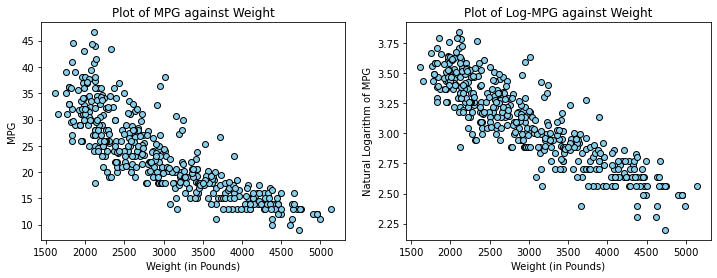

In [5]:
plt.figure(figsize = [12,4])
plt.subplot(1, 2, 1)
plt.scatter(weight, mpg, c = 'skyblue', edgecolor = 'k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')

plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight') 
plt.show()

As seen above the relation between MPG and Weight have a slight curve, where as log-MPG is more linear. Therefore we will be using log-MPG for our response variable.

## Part 2: Splitting the Data

In this part, we will be splitting our data into two sets. A training set, and a test set. the purpose of this is to make sure when we are training a machine learning model. We use a trained set for better results than a new set of data.

In [6]:
x_train = weight[0:300]
x_test = weight[300:398]

y_train = ln_mpg[0:300]
y_test = ln_mpg[300:398]

mpg_train = mpg[0:300]
mpg_test = mpg[300:398]

n_train = len(x_train)
n_test = len(x_test)

print(f"Training Set Size: {n_train}")
print(f"Test Set Size:\t   {n_test}")

Training Set Size: 300
Test Set Size:	   98


As done before, we will create scatter plots to visualize the data in the training and test sets.

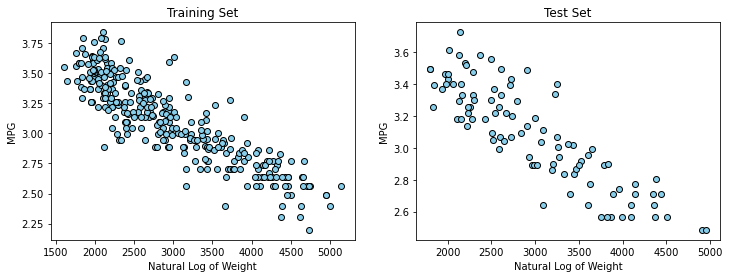

In [7]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Test Set')
plt.show() 

## Part 3: Descriptive Statistics

In this part our goal is to use the mean and variance (which we will calculate) to then calculate the coefficients for our regression model.

In [8]:
mean_x = sum(x_train) / n_train
mean_y = sum(y_train) / n_train

print(f"Mean of X = {mean_x:.2f}")
print(f"Mean of Y = {mean_y:.4f}")

Mean of X = 2968.62
Mean of Y = 3.1069


Now we will calculate the sum of squared deviations for X and Y

In [9]:
#Loop to determine the sum of squared deviation for X
Sxx = 0
for i in range(0, n_train):
    diff_x = x_train[i] - mean_x
    square_diff_x = diff_x**2
    Sxx += square_diff_x
    
#Loop to determine the sum of squared deviation for Y
Syy = 0
for j in range(0, n_train):
    diff_y = y_train[j] - mean_y
    square_diff_y = diff_y**2
    Syy += square_diff_y
    
print(f"Sxx = {Sxx:.2f}")
print(f"Syy = {Syy:.4f}")

Sxx = 224006920.44
Syy = 36.0746


Using the data gained above, we will be now calculating the variance of the training values for X and Y

In [10]:
var_x = Sxx / (n_train - 1)
var_y = Syy / (n_train - 1)

print(F"Variance of X = {var_x:.2f}")
print(F"Variance of Y = {var_y:.4f}")

Variance of X = 749187.02
Variance of Y = 0.1207


## Part 4: Linear Regression Model

This part will consist of calcualting Sxy, which we will then use to find the coefficients for the linear regression model

In [11]:
#Loop to find Sxy
Sxy = 0
for k in range(0, n_train):
    diff_xy = (x_train[k] - mean_x) * (y_train[k] - mean_y)
    Sxy += diff_xy

print(f"Sxy = {Sxy:.4f}")

Sxy = -78999.1335


Now we calculate the coeficients of our model.

In [12]:
beta_1 = Sxy / Sxx
beta_0 = mean_y - beta_1 * mean_x

print(f"beta_0 = {beta_0:.4f}")
print(f"beta_1 = {beta_1:.8f}")

beta_0 = 4.1538
beta_1 = -0.00035266


Now that we have the desired values and our equation Y = 4.1538 - 0.00035266 * X we will visualize the regression line by plotting it on top of the scatter plots for the training and test sets.

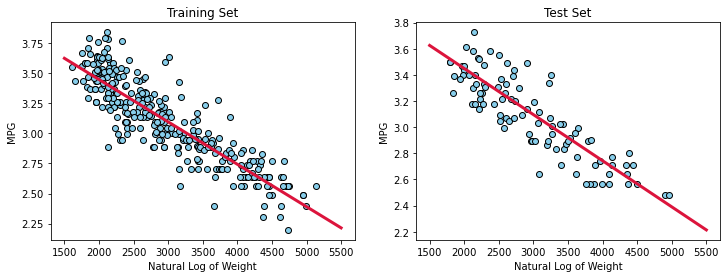

In [13]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training Score

This part will consist of first calculating the estimated response values for the training set. After that we will then calculate the training r-squared score.

In [14]:
pred_y_train = [beta_0 + beta_1 * x_train[l] for l in range(0,n_train)]

Next we will calcualte the residuals for the training set

In [15]:
error_y_train = [y_train[m] - pred_y_train[m] for m in range(0,n_train)]

Beofre we go to calculate the r-squared score, we will first display the true Y values, predicted Y values and the residual for each of the first 10 observations in the training set.

In [16]:
print(f"True y\t  Pred Y     Error")
print("--------------------------")
for i in range(0, 10):
    print(f"{y_train[i]:>6.4f}{pred_y_train[i]:>10.4f}{error_y_train[i]:>10.4f}")

True y	  Pred Y     Error
--------------------------
3.3032    3.0289    0.2743
3.4904    3.4538    0.0366
2.8959    2.9513   -0.0554
2.8622    2.7150    0.1472
3.2347    2.9089    0.3258
3.4340    3.5286   -0.0946
3.3105    3.2122    0.0983
3.6661    3.5349    0.1312
3.5351    3.3822    0.1529
3.4012    3.3939    0.0073


Next step is to calculate the Sum of Squared Errors score for the training set

In [17]:
sse_train = 0
for i in range(0, n_train):
    sse_train += error_y_train[i]**2
print(f"Training SSE = {sse_train:.4f}")           

Training SSE = 8.2145


Next is calculating the r-squared score for the training set

In [18]:
r2_train = 1 - (sse_train / Syy)
print(f"Training r-squared = {r2_train:.4f}")

Training r-squared = 0.7723


## Part 6: Test Score

For the test set we will calculating two values. The r-squared score and the estimated response values.

In [19]:
pred_y_test = [beta_0 + beta_1 * x_test[l] for l in range(0,n_test)]

Now we will calculate the residuals for the test score

In [20]:
error_y_test = [y_test[m] - pred_y_test[m] for m in range(0,n_test)]

Beofre we go to calculate the r-squared score, we will first display the true Y values, predicted Y values and the residual for each of the first 10 observations in the test set.

In [21]:
print(f"True y\t  Pred Y     Error")
print("--------------------------")
for i in range(0, 10):
    print(f"{y_test[i]:>6.4f}{pred_y_test[i]:>10.4f}{error_y_test[i]:>10.4f}")

True y	  Pred Y     Error
--------------------------
2.6391    3.0655   -0.4264
2.8904    2.8190    0.0714
2.9957    2.8663    0.1294
2.5649    2.7890   -0.2241
2.9957    3.2433   -0.2476
2.9444    3.1205   -0.1761
2.4849    2.4237    0.0612
3.2581    3.3586   -0.1005
3.7257    3.3977    0.3280
2.5649    2.7474   -0.1825


We will now calculate the sum of squared errors score for the test set

In [22]:
sse_test = 0
for i in range(0, n_test):
    sse_test += error_y_test[i]**2
print(f"Test SSE = {sse_test:.4f}")

Test SSE = 2.4848


Since we have not yet calculated the Syy value for the test set, we will do that now. then use this value and the SSE to calculate the r-squared score

In [23]:
#Using the mean of test to complete the formula for Syy
mean_y_test = sum(y_test) / n_test

Syy_test = 0
for j in range(0, n_test):
    diff_y_test = y_test[j] - mean_y_test
    square_diff_y_test = diff_y_test**2
    Syy_test += square_diff_y_test

r2_test = 1 - (sse_test / Syy_test)
print(f"Test r-sqaured {r2_test:.4f}")

Test r-sqaured 0.7435


Now we plot to visualize the errors for the observations in th test set

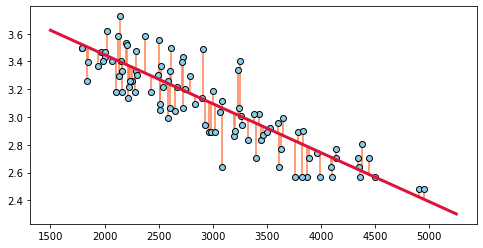

In [24]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250], c='crimson', lw=3)
for i in range(n_test):
    plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]],
    c='coral', zorder=0)
plt.show()

## Part 7: Transforming Test Predictions

In this part we will be calculating estimates for the average MPG for observations in our test set. By getting an estimate for the natual log of MPG then exponentiate that to get an estimate for the MPG.

In [25]:
e = 2.718281828
pred_mpg_test = [e ** pred_y_test[i] for i in range(0, n_test)]

We will now calculate the error in each estimate for the average MPG

In [26]:
error_mpg_test = [mpg_test[i] - pred_mpg_test[i] for i in range(0,n_test)]

Next, we will display the true MPG, estimated MPG and the estimation error for each of the first 10 observations in the test set

In [27]:
print("True MPG    Pred MPG    Error")
print("-----------------------------")
for i in range(0, 10):
    print(f"{mpg_test[i]:>8.1f}{pred_mpg_test[i]:>12.1f}{error_mpg_test[i]:>9.1f}")

True MPG    Pred MPG    Error
-----------------------------
    14.0        21.4     -7.4
    18.0        16.8      1.2
    20.0        17.6      2.4
    13.0        16.3     -3.3
    20.0        25.6     -5.6
    19.0        22.7     -3.7
    12.0        11.3      0.7
    26.0        28.7     -2.7
    41.5        29.9     11.6
    13.0        15.6     -2.6
